In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
b0 = np.loadtxt('20210408/0b.dat')
b4 = np.loadtxt('20210408/4A.dat')
b5 = np.loadtxt('20210408/5A.dat')
b5p = np.loadtxt('20210408/4.95A_pi.dat')
b5s = np.loadtxt('20210408/4.97A_sigma.dat')

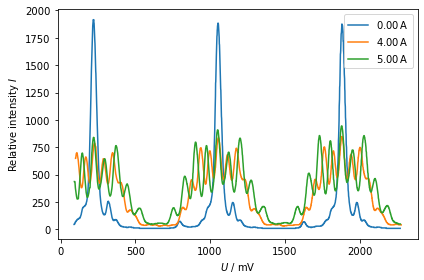

In [9]:
plt.plot(b0[:,0],b0[:,1], label='$0.00\,$A')
plt.plot(b4[:,0],b4[:,1], label='$4.00\,$A')
plt.plot(b5[:,0],b5[:,1], label='$5.00\,$A')
plt.xlabel('$U$ / mV')
plt.ylabel('Relative intensity $I$')
plt.legend()
plt.tight_layout()
plt.savefig('pic/045.pdf')

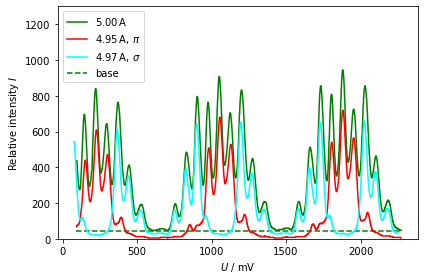

In [10]:
plt.plot(b5[:,0],b5[:,1], 'g', label='$5.00\,$A')
plt.plot(b5p[:,0],b5p[:,1], 'r', label='$4.95\,$A, $\pi$')
plt.plot(b5s[:,0],b5s[:,1], 'cyan',label='$4.97\,$A, $\sigma$')
base= (np.amin(b5[400:700,1]) + np.amin(b5[1300:1500,1]))/2
plt.hlines(base,b5[0,0],b5[-1,0],color='g',ls='dashed',label='base')

plt.xlabel('$U$ / mV')
plt.ylabel('Relative intensity $I$')
plt.legend()
plt.ylim(0,1300)
plt.tight_layout()
plt.savefig('pic/555.pdf')

145 & 221 & 294 & 371 & 444 & 446 & 527 & 665 & 755 & 830 & 903 & 976 & 1051 & 1124 & 1200 & 1274 & 1356 & 1503 & 1586 & 1661 & 1732 & 1804 & 1881 & 1953 & 2030 & 2104 & 2186
650 & 794 & 598 & 718 & 366 & 366 & 146 & 10 & 150 & 438 & 750 & 718 & 862 & 658 & 786 & 402 & 162 & 14 & 162 & 466 & 810 & 762 & 898 & 678 & 810 & 418 & 170
0.71 & 2.05 & 3.55 & 3.36 & 4.00 & 3.04 & 3.63 & 1.86 & 0.75
0.50 & 1.50 & 3.00 & 3.00 & 4.00 & 3.00 & 3.00 & 1.50 & 0.50
$-296$ & $-221$ & $-148$ & $-75$ & $0$ & $73$ & $149$ & $223$ & $305$
$-295$ & $-220$ & $-149$ & $-77$ & $0$ & $72$ & $149$ & $223$ & $305$
$-295.5$ & $-220.5$ & $-148.5$ & $-76.0$ & $0.0$ & $72.5$ & $149.0$ & $223.0$ & $305.0$
$0.89$ & $0.66$ & $0.45$ & $0.23$ & $-0.00$ & $-0.22$ & $-0.45$ & $-0.67$ & $-0.92$
$0.93$ & $0.70$ & $0.47$ & $0.23$ & $-0.00$ & $-0.23$ & $-0.47$ & $-0.70$ & $-0.93$


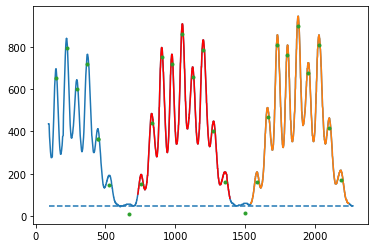

In [11]:
from scipy.signal import find_peaks

plt.plot(b5[:,0],b5[:,1], label='$5.00\,$A')
a = 1450
b = 2150
plt.plot(b5[a:b,0],b5[a:b,1])

c = 640
d = 1300
plt.plot(b5[c:d,0],b5[c:d,1],'r')

base= (np.amin(b5[400:700,1]) + np.amin(b5[1300:1500,1]))/2
plt.hlines(base,b5[0,0],b5[-1,0],ls='dashed')

x = b5[:,0][find_peaks(b5[:,1])[0]]
y = b5[:,1][find_peaks(b5[:,1])[0]]
y = y - base
plt.plot(x,y,'.')

print(' & '.join(['%.d'%i for i in x]))
print(' & '.join(['%.d'%i for i in y]))

x1 = x[8:17]
x2 = x[18:27]

y1 = y[8:17]
y2 = y[18:27]

yb = (y1+y2)/2
yr = yb/yb[4]*4
print(' & '.join(['%.2f'%i for i in yr]))
print(' & '.join(['%.2f'%i for i in [0.5,1.5,3,3,4,3,3,1.5,0.5]]))


r=2.5/(x2[4]-x1[4])
print('$'+'$ & $'.join(['%.d'%i for i in x1-x1[4]])+'$')
print('$'+'$ & $'.join(['%.d'%i for i in x2-x2[4]])+'$')
print('$'+'$ & $'.join(['%.1f'%i for i in (x1+x2-x1[4]-x2[4])/2])+'$')
print('$'+'$ & $'.join(['%.2f'%-i for i in (x1+x2-x1[4]-x2[4])/2*r])+'$')
print('$'+'$ & $'.join(['%.2f'%-i for i in np.arange(-2,2.5,0.5)*0.467])+'$')

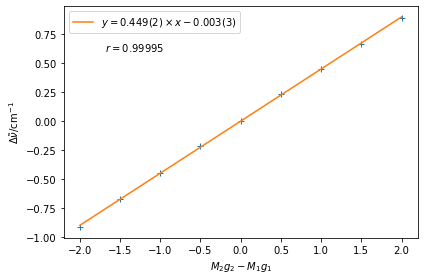

In [23]:
nu = (x1+x2-x1[4]-x2[4])/2*(-r)
dd = np.arange(-2,2.5,0.5)*(-1)

f, v = np.polyfit(dd,nu,1,cov=True)
f1 = np.poly1d(f)
plt.plot(dd,nu,'+')
plt.plot(dd,f1(dd),label=r'$y = %.3f(%.d)\times x%.3f(%.d)$'%(f[0],np.sqrt(v[0,0])*1000,f[1],np.sqrt(v[1,1])*1100))
plt.text(-2.0,0.6,'\t$r=0.99995$')
plt.legend()
plt.ylabel(r'$\Delta\tilde\nu$/cm$^{-1}$')
plt.xlabel('$M_{2}g_{2}-M_{1}g_{1}$')
plt.tight_layout()
plt.savefig('pic/fit.pdf')
# f[i] np.sqrt(v)
# from scipy.stats import linregress
# s,i,r2,p,st = linregress(dd,nu)